## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [4]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2024-06-29 19:46:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249,37M   111KB/s    in 3m 0s   

2024-06-29 19:49:57 (1,39 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [9]:
!ls -a concrete_data_week4/test/negative/

.         19781.jpg 19813.jpg 19845.jpg 19877.jpg 19909.jpg 19941.jpg 19973.jpg
..        19782.jpg 19814.jpg 19846.jpg 19878.jpg 19910.jpg 19942.jpg 19974.jpg
19751.jpg 19783.jpg 19815.jpg 19847.jpg 19879.jpg 19911.jpg 19943.jpg 19975.jpg
19752.jpg 19784.jpg 19816.jpg 19848.jpg 19880.jpg 19912.jpg 19944.jpg 19976.jpg
19753.jpg 19785.jpg 19817.jpg 19849.jpg 19881.jpg 19913.jpg 19945.jpg 19977.jpg
19754.jpg 19786.jpg 19818.jpg 19850.jpg 19882.jpg 19914.jpg 19946.jpg 19978.jpg
19755.jpg 19787.jpg 19819.jpg 19851.jpg 19883.jpg 19915.jpg 19947.jpg 19979.jpg
19756.jpg 19788.jpg 19820.jpg 19852.jpg 19884.jpg 19916.jpg 19948.jpg 19980.jpg
19757.jpg 19789.jpg 19821.jpg 19853.jpg 19885.jpg 19917.jpg 19949.jpg 19981.jpg
19758.jpg 19790.jpg 19822.jpg 19854.jpg 19886.jpg 19918.jpg 19950.jpg 19982.jpg
19759.jpg 19791.jpg 19823.jpg 19855.jpg 19887.jpg 19919.jpg 19951.jpg 19983.jpg
19760.jpg 19792.jpg 19824.jpg 19856.jpg 19888.jpg 19920.jpg 19952.jpg 19984.jpg
19761.jpg 19793.jpg 19825.jpg 19857.jpg 

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [11]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100


In [12]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [15]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30000 images belonging to 2 classes.


In [16]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical'
)

Found 9500 images belonging to 2 classes.


In [17]:

model = Sequential()

In [18]:
model.add(VGG16(
    include_top=False, # leave output layer out
    pooling='avg',
    weights='imagenet',
    ))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.layers

[<Functional name=vgg16, built=True>, <Dense name=dense, built=False>]

In [22]:
model.layers[0].trainable = False

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 1
print(steps_per_epoch_training,steps_per_epoch_validation)

300 95


In [26]:
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose="auto",
)

/Users/brncat/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 2379s 8s/step - accuracy: 0.9742 - loss: 0.1051 - val_accuracy: 0.9962 - val_loss: 0.0175


In [29]:
model.save('classifier_vgg_model.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [78]:
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    shuffle=True
    )

Found 500 images belonging to 2 classes.


In [110]:
from keras.models import load_model
model_resnet50 = load_model('classifier_resnet_model.h5')

In [111]:
eval_resnet = model_resnet50.evaluate(test_generator)
print('ResNet50 Test loss: ', eval_resnet[0])
print('ResNet50 Test Accuracy: ', eval_resnet[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 565ms/step - accuracy: 0.9982 - loss: 0.0128
ResNet50 Test loss:  0.015899961814284325
ResNet50 Test Accuracy:  0.9959999918937683


In [108]:
model_vgg = load_model('classifier_vgg_model.h5')
eval_vgg = model_vgg.evaluate(test_generator)
print('VGG Test loss: ', eval_vgg[0])
print('VGG Test Accuracy: ', eval_vgg[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9964 - loss: 0.0141
VGG Test loss:  0.012924425303936005
VGG Test Accuracy:  0.9980000257492065


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [81]:
import random

test_image = test_generator[0][0][:10]

test_class = test_generator[0][1][:10]
test_class#.shape

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

/var/folders/61/66jts0q11blds6prm54dvd1m0000gp/T/ipykernel_33064/3772046476.py:6: RuntimeWarning: invalid value encountered in cast
  image_data = test_image[ind].astype(np.uint8)


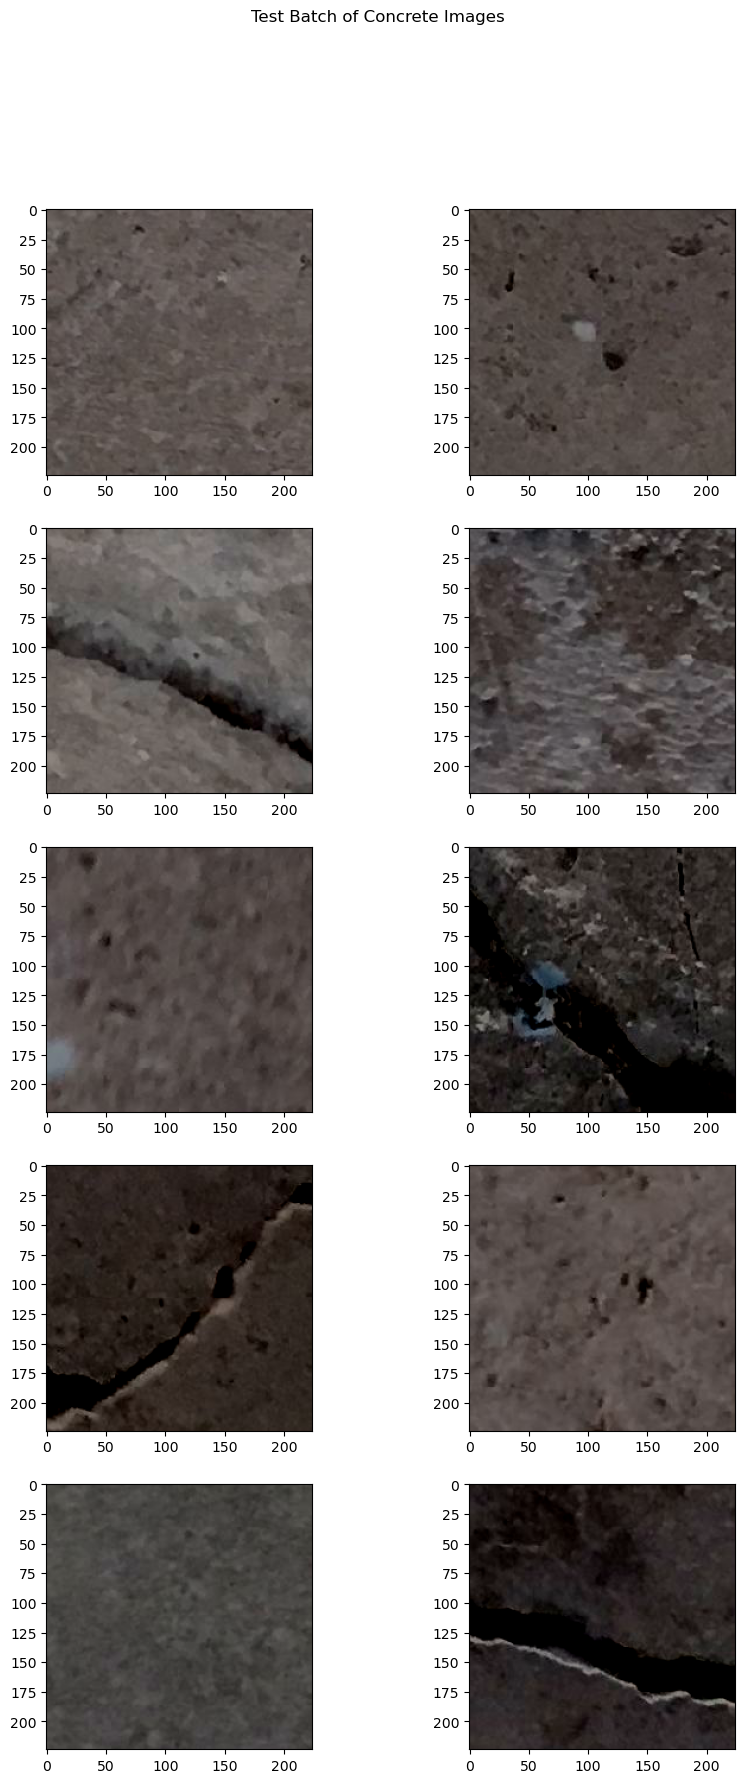

In [82]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = test_image[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Test Batch of Concrete Images') 
plt.show()

In [92]:
pred_resnet = model_resnet50.predict(test_image)

predictions = (pred_resnet >0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [104]:
predictions

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=int32)

In [105]:
test_class

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [103]:
from sklearn.metrics import mean_squared_error, accuracy_score

accuracy_score(predictions, test_class)

0.9